In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [33]:
# set configurations for number of samples
sample_size = 200
nr_sample = 20
num_steps = 100
x_b = np.linspace(0,1,num_steps)
x_h = np.linspace(0,20,num_steps)

### Bounded distributions

In [34]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [35]:
edf_df = dem.get_edf(bounded_samples, x_b)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,dist
0,0.0,0.075,0.110,0.140,0.150,0.155,0.17,0.195,0.21,0.215,...,0.865,0.885,0.895,0.915,0.920,0.945,0.955,0.970,1.0,arcsine
1,0.0,0.080,0.115,0.125,0.145,0.175,0.19,0.195,0.20,0.225,...,0.810,0.825,0.845,0.855,0.875,0.890,0.920,0.945,1.0,arcsine
2,0.0,0.090,0.120,0.145,0.160,0.180,0.19,0.190,0.21,0.220,...,0.835,0.835,0.865,0.880,0.895,0.910,0.920,0.960,1.0,arcsine


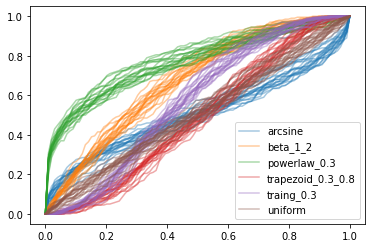

In [36]:
dem.get_edf_plot_2(edf_df, x_b)

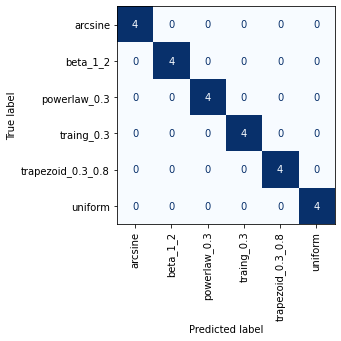

array([1., 1., 1., 1., 1.])

In [28]:
test_size = 0.2
cv = 5
cm.svm_model(edf_df, test_size, cv, plot=1)

In [8]:
def cv_num_steps_sample_size(sample_size_list, nr_moments_list, dists):
    acc = list()
    for i in sample_size_list:
        samples = dm.get_samples(dists, nr_sample, i)
        acc_ = [] 

        for j in num_steps_list:
            x = np.linspace(0,1,j)
            df = dem.get_edf(samples, x)
            score = cm.svm_model(df, test_size, cv)
            acc_.append(score.mean())

        acc.append(acc_)
    return acc

In [9]:
sample_size_list = [5, 10, 25, 50, 100, 150, 200, 500, 750, 1000]
num_steps_list = list(np.arange(5,200,5))
acc = cv_num_steps_sample_size(sample_size_list, num_steps_list, bounded_dists)

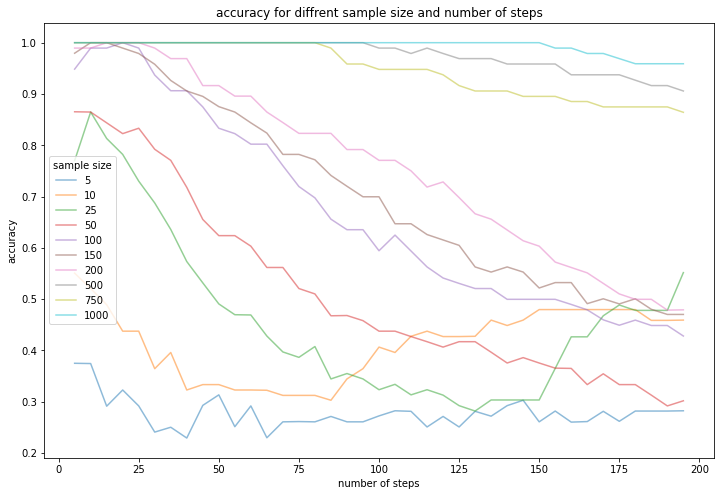

In [10]:
plt.figure(figsize=(12, 8))
for i in range(len(acc)):
    plt.plot(num_steps_list, acc[i], label=str(sample_size_list[i]), alpha = 0.5)
    plt.title('accuracy for diffrent sample size and number of steps')
    plt.xlabel('number of steps')
    plt.ylabel('accuracy')
    plt.legend(title='sample size')
plt.show()

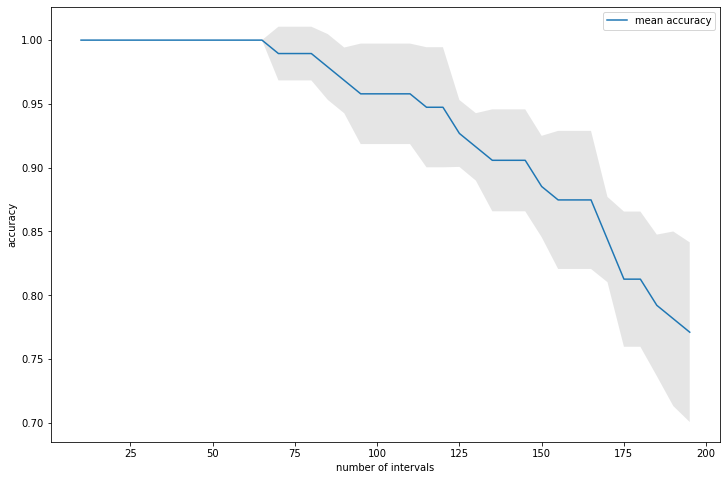

In [18]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(intervals,acc_mean, label='mean accuracy')

plt.gca().fill_between(intervals,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of intervals')
plt.ylabel('accuracy')
plt.legend();

### Heavytail distributions

In [11]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [14]:
edf_df = dem.get_edf(heavytail_samples, x_h)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,dist
0,0.0,0.512,0.720,0.816,0.876,0.900,0.92,0.938,0.944,0.954,...,0.964,0.964,0.968,0.968,0.968,0.968,0.972,0.976,0.978,cauchy
1,0.0,0.538,0.714,0.798,0.854,0.870,0.89,0.906,0.920,0.926,...,0.936,0.946,0.950,0.950,0.954,0.958,0.958,0.960,0.964,cauchy
2,0.0,0.518,0.708,0.780,0.842,0.878,0.90,0.912,0.920,0.928,...,0.948,0.950,0.950,0.952,0.952,0.956,0.958,0.960,0.964,cauchy


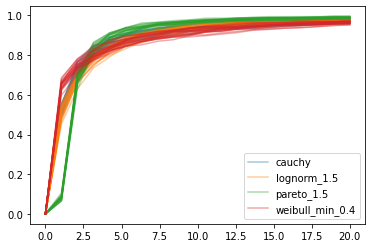

In [15]:
dem.get_edf_plot(edf_df, x_h)

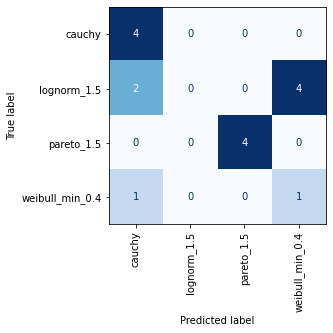

array([0.69230769, 0.76923077, 0.84615385, 0.92307692, 0.83333333])

In [16]:
test_size = 0.2
cv = 5
cm.svm_model(edf_df, test_size, cv, plot=1)

In [21]:
# testing number of intervals vs accuracy
acc_mean = []
acc_std = []
intervals = list(range(10,200,5))

for i in intervals:
    x = np.linspace(0,20,i)
    edf_df = dem.get_edf(heavytail_samples, x)
    score = cm.svm_model(edf_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

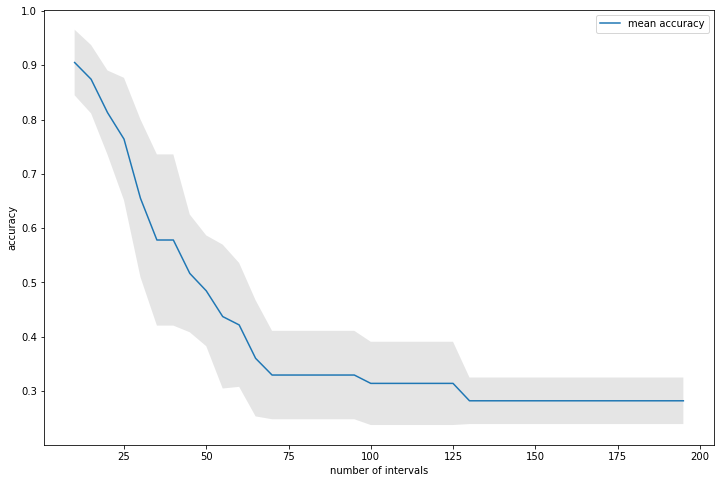

In [22]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(intervals,acc_mean, label='mean accuracy')

plt.gca().fill_between(intervals,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of intervals')
plt.ylabel('accuracy')
plt.legend();